# Actividad 3. Proyecto Integrador Etapa 1 


Lorenzo Cárdenas Cárdenas

Universidad del Valle de México

Administración de Riesgos

Docente: Mtra Clara Arechiga Alvarado

26 de mar de 2023

**Matricula:** 860131208 

La correspondiente investigación está dirigida a nombre de Lorenzo Cárdenas  Cárdenas

La correspondencia relacionada con esta investigación debe ser dirigida a nombre de Lorenzo Cárdenas Cárdenas,  Universidad del Valle de México, Calle Tezcatlipoca 2301, Los Rodríguez, 25204 Saltillo, Coah.  Correo: a860131208@my.uvm.edu.mx

# Importación de Paqueterias

In [1]:
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas_datareader as pdr
import yfinance as yf

# Importar Datos

In [2]:
tickers = ['AAPL']
weights = np.random.random(len(tickers))
weights /= np.sum(weights)

data = yf.download(tickers, 
                   period='1y',
                   interval='1d',
                   prepost=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
data

Date
2022-04-01    173.260452
2022-04-04    177.365585
2022-04-05    174.005936
2022-04-06    170.795364
2022-04-07    171.103516
                 ...    
2023-03-27    158.279999
2023-03-28    157.649994
2023-03-29    160.770004
2023-03-30    162.360001
2023-03-31    164.899994
Name: Adj Close, Length: 251, dtype: float64

Retornos 

In [4]:
returns = data.pct_change().dropna()
returns

Date
2022-04-04    0.023693
2022-04-05   -0.018942
2022-04-06   -0.018451
2022-04-07    0.001804
2022-04-08   -0.011909
                ...   
2023-03-27   -0.012293
2023-03-28   -0.003980
2023-03-29    0.019791
2023-03-30    0.009890
2023-03-31    0.015644
Name: Adj Close, Length: 250, dtype: float64

## Determina las observaciones de mínimo y máximo valor en la serie de tiempo

In [5]:
num_data = len(returns)
minima = returns.min()
maxima = returns.max()    
rango = maxima - minima

In [6]:
print('Minima: ', minima
      ,'\nMaxima: ', maxima
      ,'\nRango: ', rango
      ,'\nNumero de datos: ', num_data)


Minima:  -0.05867957400682189 
Maxima:  0.08897456365827372 
Rango:  0.1476541376650956 
Numero de datos:  250


## Elige un número de subintervalos de igual magnitud que cubra desde el mínimo hasta el máximo valor. Estos son los rangos o clases

In [7]:
k = 1 + 3.322 * np.log10(num_data)
k = int(k)
amplitud = rango / k
print('Amplitud: ', amplitud.round(6)
      ,'\nNumero de intervalos: ', k)

Amplitud:  0.018457 
Numero de intervalos:  8


## Cuenta el número de observaciones que pertenecen a cada rango o intervalo. Ésta es la frecuencia por clase

In [8]:
grupos = minima + np.arange(k+1) * amplitud
grupos = pd.cut(returns, bins=grupos)
grupos

Date
2022-04-04       (0.0151, 0.0336]
2022-04-05    (-0.0218, -0.00331]
2022-04-06    (-0.0218, -0.00331]
2022-04-07     (-0.00331, 0.0151]
2022-04-08    (-0.0218, -0.00331]
                     ...         
2023-03-27    (-0.0218, -0.00331]
2023-03-28    (-0.0218, -0.00331]
2023-03-29       (0.0151, 0.0336]
2023-03-30     (-0.00331, 0.0151]
2023-03-31       (0.0151, 0.0336]
Name: Adj Close, Length: 250, dtype: category
Categories (8, interval[float64, right]): [(-0.0587, -0.0402] < (-0.0402, -0.0218] < (-0.0218, -0.00331] < (-0.00331, 0.0151] < (0.0151, 0.0336] < (0.0336, 0.0521] < (0.0521, 0.0705] < (0.0705, 0.089]]

In [9]:
frecuencia = grupos.value_counts(sort=False)
frecuencia = frecuencia.to_frame()
frecuencia.columns = ['Frecuencia']
frecuencia


,Frecuencia
"(-0.0587, -0.0402]",6
"(-0.0402, -0.0218]",28
"(-0.0218, -0.00331]",70
"(-0.00331, 0.0151]",88
"(0.0151, 0.0336]",43
"(0.0336, 0.0521]",12
"(0.0521, 0.0705]",0
"(0.0705, 0.089]",2


# Determina la frecuencia relativa mediante la división entre frecuencias por clase y el número de observaciones. Es decir, la frecuencia relativa es una fracción de las observaciones que pertenecen a cada clase

In [10]:
frecuencia_rel = frecuencia / num_data
frecuencia['Frecuencia relativa'] = frecuencia_rel
frecuencia

,Frecuencia,Frecuencia relativa
"(-0.0587, -0.0402]",6,0.024
"(-0.0402, -0.0218]",28,0.112
"(-0.0218, -0.00331]",70,0.280
"(-0.00331, 0.0151]",88,0.352
"(0.0151, 0.0336]",43,0.172
"(0.0336, 0.0521]",12,0.048
"(0.0521, 0.0705]",0,0.000
"(0.0705, 0.089]",2,0.008


grafico

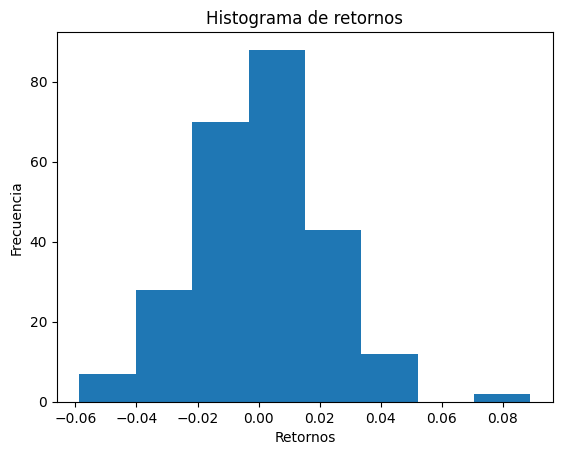

In [11]:
plt.hist(returns, bins=8)
plt.title('Histograma de retornos')
plt.xlabel('Retornos')
plt.ylabel('Frecuencia')
plt.show()

# Referencias

Lara, A. (2008). Medición y control de riesgos financieros. [versión electrónica]. Recuperado de https://es.scribd.com/doc/48773171/Medicion-y-Control-de-Riesgos-Financieros-LIBRO-DE-ALFONSO-DE-LARA-HARO


Allen, F., Myers, S., y Brealey, R. (2015). Principios de finanzas corporativas. Haga clic para ver más opciones [archivo PDF]. Recuperado de https://www.u-cursos.cl/usuario/b8c892c6139f1d5b9af125a5c6dff4a6/mi_blog/r/Principios_de_Finanzas_Corporativas_9Ed__Myers.pdf

# Actividad 7. Proyecto Integrador Etapa 2


Lorenzo Cárdenas Cárdenas

Universidad del Valle de México

Administración de Riesgos

Docente: Mtra Clara Arechiga Alvarado

23 de Abril de 2023

**Matricula:** 860131208 

La correspondiente investigación está dirigida a nombre de Lorenzo Cárdenas  Cárdenas

La correspondencia relacionada con esta investigación debe ser dirigida a nombre de Lorenzo Cárdenas Cárdenas,  Universidad del Valle de México, Calle Tezcatlipoca 2301, Los Rodríguez, 25204 Saltillo, Coah.  Correo: a860131208@my.uvm.edu.mx

Instrucciones:
Lee detenidamente el siguiente planteamiento y resuelve. Deberás incluir el procedimiento, análisis y resultado, para ello puedes utilizar hojas de cálculo u otro formato, como escanear los datos si es que la haces a lápiz en papel; en cualquier caso, deberás cuidar la legibilidad de la información. 










Realiza el análisis del riesgo de crédito.
El valor nocional de instrumento financiero es de $200,000.00 y si la operación tuviera liquidez hoy, el tenedor del instrumento recibiría de la contraparte $20,000.00 (que es la ganancia no realizada de la transacción). Por su parte, el estimado de lo que podría variar el mercado en el periodo remanente del contrato (Deemed Risk) es de 8%, y por tanto, el riesgo potencial para este caso es de $16,000.00.



In [1]:
# Calcula el riesgo de crédito, a partir de la fórmula.

# Riesgo de crédito = Riesgo vigente  +  Riesgo potencial

RV = 20000
RP = 16000

RC = RV + RP
print('Riesgo de crédito: ', RC)


Riesgo de crédito:  36000


Si tenemos que la probabilidad de incumplimiento de una contraparte califica como BBB S&P es de .18%, la tasa de recuperación del colateral es de $51.13 por cada $100 y la exposición de riesgo de crédito es de 100 millones de pesos, la pérdida esperada por riesgo de crédito sera como sigue: 

In [2]:
# Calcula la perdida esperada asociada a una contraparte.

P_Incumplimiento = .0018
exposicion = 100_000_000
tasa_recuperacion = .5113

PE = P_Incumplimiento * exposicion * (1 - tasa_recuperacion)
print('Perdida esperada: ', PE)


Perdida esperada:  87966.0


# Referencias

Lara, A. (2008). Medición y control de riesgos financieros. [versión electrónica]. Recuperado de https://es.scribd.com/doc/48773171/Medicion-y-Control-de-Riesgos-Financieros-LIBRO-DE-ALFONSO-DE-LARA-HARO